In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_layers = 7
n_neurons = 128
n_inputs = 4 
n_outputs = 1
file_path_old = "../content/drive/My Drive/VDK/data/danangdaily2019.csv"
file_path_new = []
file_path_new.append("../content/drive/My Drive/VDK/data/danangdaily.csv")
file_path_new.append("../content/drive/My Drive/VDK/data/danangdaily1.csv")
file_path_new.append( "../content/drive/My Drive/VDK/data/danangdaily2.csv")
file_path_new.append( "../content/drive/My Drive/VDK/data/danangdaily3.csv")
def read_data(file_path):
  data=pd.read_csv(file_path, delimiter=',',header=11,skipinitialspace=True, usecols=['Temperature', 'Relative Humidity', 'Mean Sea Level Pressure', 'Total Precipitation'] )
  X = np.array(data)
  X[X[:, n_inputs - 1 ]/2 >= 0.3, n_inputs - 1] = 1
  X[X[:, n_inputs - 1 ]/2 < 0.3, n_inputs - 1] = 0
  return X
X = read_data(file_path_old)
y_train = X[1:, n_inputs-1].reshape(-1, 1)
size_train = 7 * int (y_train.shape[0] / 7) 
# X_train = read_data(file_path_old)
# X_test = np.empty((0,n_inputs))
# for path in file_path_new:
#   data = read_data(path)
#   X_test = np.concatenate((X_test, data), axis = 0) 
# # temperature = np.array(data["Temperature"]).reshape(-1, 1)
# # relative_humidity = np.array(data["Relative Humidity"]).reshape(-1, 1)
# # MSLP = np.array(data["Mean Sea Level Pressure"]).reshape(-1, 1)
# # precipitation_total = np.array(data["Precipitation Total"]).reshape(-1, 1)
# # X = np.concatenate((temperature, relative_humidity, MSLP, precipitation_total), axis = 1)
y_train = y_train[0:size_train]
X_train = X[0:size_train]

X_test = np.empty((0,n_inputs))
y_test = np.empty((0))
for path in file_path_new:
  print(path)
  data = read_data(path)
  target = data[1:, n_inputs - 1]
  data = data[:-1]
  X_test = np.concatenate((X_test, data), axis = 0)
  y_test = np.concatenate((y_test, target)) 
size_test = 7 * int (y_test.shape[0]/7)
X_test = X_test[0:size_test]
y_test = y_test[0:size_test]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


../content/drive/My Drive/VDK/data/danangdaily.csv
../content/drive/My Drive/VDK/data/danangdaily1.csv
../content/drive/My Drive/VDK/data/danangdaily2.csv
../content/drive/My Drive/VDK/data/danangdaily3.csv
(364, 4) (364, 1) (56, 4) (56,)


In [4]:
def create_batches(X, y, n_layer, n_input, n_output):
  X_batches = X.reshape(-1, n_layer, n_input)
  y_batches = y.reshape(-1, n_layer, n_output)
  return X_batches, y_batches
X_batches, y_batches = create_batches(X_train, y_train, n_layers, n_inputs, n_outputs)
X_test_batches, y_test_batches = create_batches(X_test, y_test, n_layers, n_inputs, n_outputs)
print(X_test_batches.shape, y_test_batches.shape)
print(X_train, y_train)

(8, 7, 4) (8, 7, 1)
[[2.05197320e+01 8.71122060e+01 1.02141670e+03 1.00000000e+00]
 [2.06488970e+01 8.84133400e+01 1.02046246e+03 1.00000000e+00]
 [2.10126510e+01 9.03534000e+01 1.01958746e+03 1.00000000e+00]
 ...
 [2.29338970e+01 8.96817600e+01 1.01655830e+03 1.00000000e+00]
 [2.36330660e+01 8.80373300e+01 1.01581250e+03 1.00000000e+00]
 [2.38326500e+01 9.03114300e+01 1.01677910e+03 1.00000000e+00]] [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

In [5]:

#Variable input and output
X = tf.placeholder(tf.float32, [None, n_layers, n_inputs])
y = tf.placeholder(tf.float32, [None, n_layers, n_outputs])
#Model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, c_states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
stacked_rnn_output = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs =tf.layers.dense(stacked_rnn_output, n_outputs, activation='sigmoid' )
outputs = tf.reshape(stacked_outputs, [-1, n_layers, n_outputs])
# outputs[outputs[:, :, 0] >= 0.5] =1
# outputs[outputs[:, :, 0] < 0.5 ] =0
#loss_function and optimizer
lr = 0.001
loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
trainning_op =optimizer.minimize(loss)
init = tf.global_variables_initializer()


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [6]:
#Trainning
epoches = 400000
saver = tf.train.Saver()
with tf.Session() as sess:
  init.run()
  for ep in range(epoches):
    print(ep)
    sess.run(trainning_op, feed_dict={X: X_batches, y: y_batches})
  y_pred = sess.run(outputs, feed_dict={X: X_test_batches})
  save_path = saver.save(sess, "../content/drive/My Drive/VDK/model2/model.ckpt")

print(y_pred)

Streaming output truncated to the last 5000 lines.
395064
395065
395066
395067
395068
395069
395070
395071
395072
395073
395074
395075
395076
395077
395078
395079
395080
395081
395082
395083
395084
395085
395086
395087
395088
395089
395090
395091
395092
395093
395094
395095
395096
395097
395098
395099
395100
395101
395102
395103
395104
395105
395106
395107
395108
395109
395110
395111
395112
395113
395114
395115
395116
395117
395118
395119
395120
395121
395122
395123
395124
395125
395126
395127
395128
395129
395130
395131
395132
395133
395134
395135
395136
395137
395138
395139
395140
395141
395142
395143
395144
395145
395146
395147
395148
395149
395150
395151
395152
395153
395154
395155
395156
395157
395158
395159
395160
395161
395162
395163
395164
395165
395166
395167
395168
395169
395170
395171
395172
395173
395174
395175
395176
395177
395178
395179
395180
395181
395182
395183
395184
395185
395186
395187
395188
395189
395190
395191
395192
395193
395194
395195
395196
395197
395198
3951

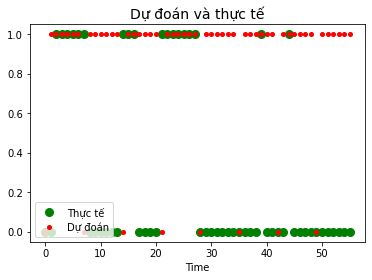

In [7]:
# saver = tf.train.Saver()
# with tf.Session() as sess:
#   sess.run(tf.global_variables_initializer())
#   save_path = saver.restore(sess, "../content/drive/My Drive/VDK/model2/model.ckpt")
#   y_pred = sess.run(outputs, feed_dict={X: X_test_batches})
plt.title("Dự đoán và thực tế", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test_batches)), "bo", markersize=8, label="Thực tế", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Dự đoán", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()

In [8]:

print(100*np.mean(y_pred==y_test_batches))

35.714285714285715
